In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-car-model-dataset-all-data-you-need/Car_Models.csv


In [2]:
df_car_models = pd.read_csv("/kaggle/input/2023-car-model-dataset-all-data-you-need/Car_Models.csv")
df_car_models.head()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
0,Ferrari,812 Superfast,789 hp,530 lb-ft,7-speed automatic,RWD,13/20 mpg,2,"$366,712",2018 - Present,Coupe,6.5L V12,12
1,Ferrari,F8 Tributo,710 hp,568 lb-ft,7-speed automatic,RWD,15/19 mpg,2,"$276,550",2020 - Present,Coupe,3.9L V8,8
2,Ferrari,Roma,611 hp,560 lb-ft,8-speed automatic,RWD,16/24 mpg,2,"$218,750",2021 - Present,Coupe,3.9L V8,8
3,Ferrari,Portofino M,612 hp,561 lb-ft,8-speed automatic,RWD,16/22 mpg,2,"$254,475",2021 - Present,Convertible,3.9L V8,8
4,Ferrari,SF90 Stradale,986 hp,590 lb-ft,8-speed automatic,AWD,18 mpg (combined),2,"$625,000",2020 - Present,Coupe,4.0L V8,8


#### **About this file:** 
<p>
The car model dataset is a comprehensive collection of information about cars. It includes information about the car's specifications, such as:<br>

**Company** - The name of the car manufacturer.<br>
**Model** - The name of the car model.<br>
**Horsepower** - The maximum power output of the car's engine, measured in horsepower.<br>
**Torque** - The maximum twisting force of the car's engine, measured in Newton-meters.<br>
**Transmission Type** - The type of transmission used in the car, such as manual, automatic, or CVT<br>
**Drivetrain** - The type of drivetrain used in the car, such as front-wheel drive, rear-wheel drive, or all-wheel drive.<br>
**Fuel Economy** - The fuel efficiency of the car, measured in miles per gallon (mpg) or liters per 100 kilometers (L/100km).<br>
**Number of Doors** - The number of doors on the car.<br>
**Price** - The price of the car, in US dollars.<br>
**Model Year Range** - The range of model years that the car was produced.<br>
**Body Type** - The type of body style of the car, such as sedan, SUV, or hatchback.<br>
**Engine Type** - The type of engine used in the car, such as gasoline, diesel, or electric.<br>
**Number of Cylinders** - The number of cylinders in the car's engine.</p>

In [3]:
df_car_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              404 non-null    object
 1   Model                404 non-null    object
 2   Horsepower           404 non-null    object
 3   Torque               404 non-null    object
 4   Transmission Type    404 non-null    object
 5   Drivetrain           404 non-null    object
 6   Fuel Economy         399 non-null    object
 7   Number of Doors      404 non-null    object
 8   Price                398 non-null    object
 9   Model Year Range     403 non-null    object
 10  Body Type            403 non-null    object
 11  Engine Type          403 non-null    object
 12  Number of Cylinders  402 non-null    object
dtypes: object(13)
memory usage: 41.2+ KB


In [4]:
df_car_models.describe()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
count,404,404,404,404,404,404,399,404,398,403,403,403,402
unique,62,374,232,205,68,22,250,22,323,125,31,94,23
top,Chevrolet,Zoe,148 hp,184 lb-ft,8-speed automatic,Front-wheel drive,9 mpg,5,"Starting at $32,990",2023-2024,SUV,4-cylinder,4
freq,20,2,12,19,81,79,10,121,5,85,135,93,163


In [5]:
df_car_models.columns

Index(['Company', 'Model', 'Horsepower', 'Torque', 'Transmission Type',
       'Drivetrain', 'Fuel Economy', 'Number of Doors', 'Price',
       'Model Year Range', 'Body Type', 'Engine Type', 'Number of Cylinders'],
      dtype='object')

In [6]:
df_car_models.isna().sum()

Company                0
Model                  0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Fuel Economy           5
Number of Doors        0
Price                  6
Model Year Range       1
Body Type              1
Engine Type            1
Number of Cylinders    2
dtype: int64

In [7]:
# dropping missing values
df_car_models=df_car_models.dropna()
df_car_models.isna().sum()

Company                0
Model                  0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Fuel Economy           0
Number of Doors        0
Price                  0
Model Year Range       0
Body Type              0
Engine Type            0
Number of Cylinders    0
dtype: int64

In [8]:
df_car_models['Horsepower'].unique()

array(['789 hp', '710 hp', '611 hp', '612 hp', '986 hp', '711 hp',
       '680 hp', '661 hp', '553 hp', '950 hp', '109 hp', '140 hp',
       '152 hp (petrol), 132 hp (diesel)', '75 hp', '121 hp', '178 hp',
       '203-301 hp', '169 hp', '203-219 hp', '295-295 hp', '270 hp',
       '159-278 hp', '381 hp', '310-760 hp', '290-450 hp', '300-400 hp',
       '181-250 hp', '250-335 hp', '181-245 hp', '275-650', '490-755',
       '98', '170-252', '355', '355-420', '285-420', '200-308', '188-248',
       '300', '149-188', '122', '181', '260', '284-284', '390', '565-600',
       '228 hp', '248 hp', '335 hp', '255 hp', '473 hp', '600 hp',
       '429 hp', '416 hp', '184 hp', '201 hp', '261 hp', '110-292',
       '147-228', '174-276', '235-276', '184-268', '300 hp', '379 hp',
       '325 hp', '563', '624', '533 hp', '562 hp', '592 hp', '671 hp',
       '203-302', '241-311', '416-471', '169-181', '235-239', '290-308',
       '301', '383', '147 - 201', '191 - 290', '161 - 181', '191 - 277',
       '

In [9]:
df_car_models['Torque'].unique()

array(['530 lb-ft', '568 lb-ft', '560 lb-ft', '561 lb-ft', '590 lb-ft',
       '514 lb-ft', '557 lb-ft', '664 lb-ft', '200 Nm', '320 Nm',
       '320 Nm (petrol), 300 Nm (diesel)', '210 Nm', '300 Nm', '420 Nm',
       '182-267 lb-ft', '151 lb-ft', '184-265 lb-ft', '263-263 lb-ft',
       '278 lb-ft', '180-265 lb-ft', '401 lb-ft', '350-625 lb-ft',
       '265-510 lb-ft', '310-415 lb-ft', '190-280 lb-ft', '275-380 lb-ft',
       '310 lb-ft', '190-275 lb-ft', '295-650', '465-715', '94',
       '203-260', '383', '383-460', '305-460', '191-369', '180-273',
       '261', '146-180', '114', '181', '240', '259-259', '394', '467-481',
       '258 lb-ft', '330 lb-ft', '295 lb-ft', '406 lb-ft', '553 lb-ft',
       '273 lb-ft', '384 lb-ft', '450 lb-ft', '221 lb-ft', '236 lb-ft',
       '147-295', '184-258', '206-295', '258-266', '221-258', '280 lb-ft',
       '331 lb-ft', '332 lb-ft', '605 lb-ft', '627 lb-ft', '398 lb-ft',
       '443 lb-ft', '457 lb-ft', '531 lb-ft', '184-267 lb-ft',
       '258-2

In [10]:
df_car_models['Transmission Type'].unique()

array(['7-speed automatic', '8-speed automatic',
       '6-speed Manual, 6-speed AMT', '6-speed Manual',
       '6-speed Manual, 6-speed AT', '5-speed Manual',
       '7-speed Automatic', 'Continuously variable-speed automatic',
       '5-speed automatic', '6-speed automatic / 6-speed manual',
       '6-speed automatic', '6-speed manual/10-speed automatic',
       '6-speed automatic/10-speed automatic', '10-speed automatic',
       'Manual, Automatic', 'CVT', 'Automatic', '9-speed automatic',
       '8-speed Automatic', '7-speed auto-shift manual',
       'Automatic, Manual', '6-speed manual', '8-speed PDK',
       '8-speed Tiptronic S', '7-speed PDK', '8-Speed Automatic',
       'Manual, Automatic, CVT', 'Automatic, Dual-Clutch',
       'CVT or 6-speed manual',
       '6-speed automatic or 7-speed dual-clutch',
       '6-speed automatic or 8-speed automatic',
       '6-speed manual, CVT, or 7-speed dual-clutch', 'Manual',
       '5-speed manual', 'Single-Speed Automatic',
       'Sing

In [11]:
df_car_models['Drivetrain'].unique()

array(['RWD', 'AWD', 'FWD', '4WD', 'FWD / AWD', 'RWD / 4WD', 'RWD/4WD',
       'FWD/AWD', 'FWD or AWD', 'RWD or AWD', 'Front-wheel drive',
       'All-wheel drive', 'FWD, AWD', 'RWD/AWD', 'Rear-wheel drive',
       'Rear-wheel drive or all-wheel drive', '0-60 mph in 3 seconds',
       'Front-wheel drive or all-wheel drive',
       'Rear-wheel drive or 4-wheel drive', '4-wheel drive',
       'Rear-wheel drive or four-wheel drive',
       'Rear-wheel drive, all-wheel drive'], dtype=object)

In [12]:
df_car_models['Fuel Economy'].unique()

array(['13/20 mpg', '15/19 mpg', '16/24 mpg', '16/22 mpg',
       '18 mpg (combined)', '15/20 mpg', '12/17 mpg', '15/22 mpg',
       '16/23 mpg', '12 mpg (combined)', '13-20 km/l', '15 km/l',
       '7-12 km/l', '16 km/l', '17 km/l', '12 km/l', '26-34 mpg',
       '30-33 mpg', '27-40 mpg', '21-36 mpg', '16-19 mpg', '18-23 mpg',
       '13-17 mpg', '16-21 mpg city / 24-32 mpg highway',
       '16-20 mpg city / 22-26 mpg highway',
       '18-21 mpg city / 24-28 mpg highway',
       '23-26 mpg city / 31-34 mpg highway',
       '21-22 mpg city / 28-29 mpg highway',
       '21-23 mpg city / 26-26 mpg highway',
       '23-25 mpg city / 28-32 mpg highway', '16-23 mpg', '15-23 mpg',
       '22-28 mpg', '15-20 mpg', '15-22 mpg', '17-22 mpg', '28-32 mpg',
       '23-26 mpg', '28-33 mpg', '32-35 mpg', '27-30 mpg', '20-24 mpg',
       '13-16 mpg', '16-20 mpg', '26/33 mpg', '23/29 mpg', '21/26 mpg',
       '26/36 mpg', '24/34 mpg', '22/29 mpg', '15/21 mpg', '24/35 mpg',
       '22/31 mpg', '13/17 m

In [13]:
df_car_models['Number of Doors'].unique()

array(['2', '4', '5', '5, 7', '4, 6', '7, 8', '2 / 4', '2/4', '4/5',
       '4/5/6/8', '4 doors', '2 doors', '2, 4', '4, 5', '4, 5, 2007',
       '4 or 5', '4, 6, 2007', '2-4', '3', '7', '8'], dtype=object)

In [14]:
df_car_models['Price'].unique()

array(['$366,712', '$276,550', '$218,750', '$254,475', '$625,000',
       '$350,050', '$298,750', '$262,647', '$202,723', '$1,420,000',
       'Rs. 7.96 - 13.33 Lakh', 'Rs. 12.57 - 16.53 Lakh',
       'Rs. 12.11 - 16.86 Lakh', 'Rs. 8.67 - 9.39 Lakh',
       'Rs. 12.4 - 14.12 Lakh', 'Rs. 28.74 - 31.73 Lakh',
       '$25,045-$35,130', '$20,025-$25,725', '$26,250-$37,330',
       '$35,085-$47,230', '$36,765-$50,745', '$26,150-$46,780',
       '$33,675-$51,995', '$28,450-$61,600', '$28,940-$70,825',
       '$33,860-$54,365', '$26,130-$40,395', '$32,250-$43,400',
       '$24,820-$42,660', '$26,820-$38,160', '$25,000-$72,000',
       '$60,000-$125,000', '$13,400-$16,800', '$25,000-$35,000',
       '$51,700-$76,000', '$49,000-$75,000', '$28,000-$60,000',
       '$26,000-$45,000', '$25,225-$36,550', '$37,240-$44,030',
       '$20,460-$24,940', '$15,650-$18,340', '$26,980-$34,430',
       '$32,610-$45,030', '$32,940-$45,340', '$52,300-$69,050',
       '$113,540-$210,740', '$35,400', '$43,000', 

In [15]:
df_car_models['Model Year Range'].unique()

array(['2018 - Present', '2020 - Present', '2021 - Present',
       '2019 - 2020', '2017 - 2020', '2016 - 2019', '2015 - 2018',
       '2014 - 2016', '2019 - present', '2020 - present',
       '2001 - present', '2018 - present', '2018-2021', '2019-2021',
       '2015-2021', '2021', '2010-2021', '1953-2021', '2013-2021',
       '2005-2021', '1935-2021', '1995-2021', '1999-2021', '2004-2021',
       '2019-2022', '2020-2022', '2022', '2019-present', '2016-present',
       '2018-present', '2017-present', '1974-2022', '1980-2022',
       '1973-2022', '2018-2022', '2007-2022', '2017-2021', '2020-2021',
       '2014-2021', '2016-2021', '2016-2018', '2017-2018', '2019',
       '2018-2020', '2022- present', '1989-Present', '1998-Present',
       '1993-2020', '2019-Present', '2015-Present', '2003-Present',
       '1996-Present', '2017 - 2022', '2018 - 2022', '2016 - 2022',
       '2019 - 2022', '2019 - 2021', '2020 - 2022', '2014 - Present',
       '2017 - Present', '2011 - Present', '2012-2023'

In [16]:
df_car_models['Body Type'].unique()

array(['Coupe', 'Convertible', 'Hatchback', 'SUV', 'MPV', 'Sedan',
       'Pickup truck', 'Coupe/Convertible', 'Pickup Truck',
       'Coupe, Convertible', 'Truck', 'Sports Car', 'Sedan, Hatchback',
       'Wagon/SUV', 'Wagon', 'Van', 'Track Car', '4-seater', 'Crossover',
       'Sports car', 'Minivan', 'Electric hypercar', 'City car', 'Coupé',
       'Saloon', 'Roadster', '2-door sports car', '5-door SUV',
       '2-door grand tourer', 'Hybrid', 'Electric car'], dtype=object)

In [17]:
df_car_models['Engine Type'].unique()

array(['6.5L V12', '3.9L V8', '4.0L V8', '6.3L V12',
       '1.2L Turbo Petrol, 1.5L Turbo Diesel', '2.2L mHawk Diesel',
       '2.0L Turbo Petrol, 2.2L mHawk Diesel', '1.5L mHawk75 Diesel',
       '1.5L mHawk Diesel', '2.5L 4-cylinder / 3.5L V6',
       '2.0L 4-cylinder', '2.5L 4-cylinder', '3.5L V6', '4.0L V6',
       '2.7L 4-cylinder / 3.5L V6', '5.7L V8', 'Gas V6/V8',
       'Gas V6/V8, Diesel V6', 'Gas I4/V6, Hybrid V6',
       'Gas I3/I4, Hybrid I4', 'Gas I4/V6', 'Gas I4', 'Gas I3/I4', 'Gas',
       'Gas, Diesel', 'Turbocharged Gas I4', 'Turbocharged Gas I6',
       'Twin-Turbocharged Gas I6', 'Twin-Turbocharged Gas V8', 'Inline-4',
       'V-8', '2.0 L 4-cylinder', 'Gas, Hybrid', 'Turbocharged flat-4',
       'Twin-turbocharged flat-6', 'Turbocharged V6',
       'Turbocharged inline-4', 'V12', 'V8', 'V6', 'Gas/Electric',
       'Gas/Hybrid', 'Inline-4, Inline-4 Hybrid, Inline-6',
       'Inline-4, Inline-4 Hybrid', 'Inline-4, Inline-4 Hybrid, V6',
       'Inline-4, Inline-4 EV',

In [18]:
df_car_models['Number of Cylinders'].unique()

array(['12', '8', '3/4', '4', '3', '4 / 6', '6', '4/6/2008', '6/8', '4/6',
       '4, 6, 2008', '6, 8', '4, 6', '4, 5, 2006', '4 or 6', '0', '6-8',
       '10', '16', '6 or 8', 'V6', '1', '3, 4'], dtype=object)

In [19]:
df_car_models['Number of Cylinders'].value_counts()

4             161
6              57
8              51
0              25
12             22
3              21
4, 6           10
6-8             9
1               7
16              4
6, 8            4
4/6             4
6/8             4
4, 6, 2008      3
10              3
3/4             3
4 or 6          2
4 / 6           2
4, 5, 2006      1
4/6/2008        1
6 or 8          1
V6              1
3, 4            1
Name: Number of Cylinders, dtype: int64

In [20]:
# inconsistant rows of 
inconsistant_df_temp=pd.concat([df_car_models[df_car_models['Number of Cylinders']=='4, 6, 2008'],
                                df_car_models[df_car_models['Number of Cylinders']=='4/6/2008'],
                               df_car_models[df_car_models['Number of Cylinders']=='4, 5, 2006']], axis=0)


In [21]:
inconsistant_df_temp

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
30,Chevrolet,Camaro,275-650,295-650,"Manual, Automatic",RWD,16-23 mpg,2,"$25,000-$72,000",2010-2021,Coupe,Gas,"4, 6, 2008"
70,Volkswagen,Passat,174-276,206-295,"Automatic, Manual",FWD,23-34 mpg,"4, 5","$24,990",1973-2022,Sedan,"Gas, Diesel","4, 6, 2008"
71,Volkswagen,Atlas,235-276,258-266,Automatic,"FWD, AWD",18-22 mpg,"4, 5, 2007","$31,545",2018-2022,SUV,"Gas, Hybrid","4, 6, 2008"
23,Ford,Mustang,310-760 hp,350-625 lb-ft,6-speed manual/10-speed automatic,RWD,16-21 mpg city / 24-32 mpg highway,2,"$28,450-$61,600",2015-2021,Coupe/Convertible,Gas V6/V8,4/6/2008
38,Chevrolet,Colorado,200-308,191-369,"Manual, Automatic",RWD/4WD,17-22 mpg,2/4,"$26,000-$45,000",2004-2021,Truck,"Gas, Diesel","4, 5, 2006"


#### All the columns have inconsistencies


In [22]:
df_car_models['Price']=df_car_models['Price'].str.replace(',', '')
df_car_models['Price']=df_car_models['Price'].str.replace('$', '')

/tmp/ipykernel_20/3037808526.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_car_models['Price']=df_car_models['Price'].str.replace('$', '')


In [23]:
cleaned_prices = [price.replace('Starting at ', '') for price in df_car_models["Price"]]

In [24]:
import re

def convert_to_usd(value):
    
    value=str(value).replace(' ','')  
    if '£' in value:
        value = float(value.replace('£', '')) / 1.05
    
    elif '€' in value:
        value = float(value.replace('€', '')) / 1.2     
        
    elif ('Rs.' in value) or ('₹' in value):
        if 'Lakh' in value or 'lakhs' in value:
            if "-" in value:
                min_val, max_val = value.split('-')
                min_val=str(min_val).replace('lakhs','').replace('Lakh','')
                value=float(min_val.replace('Rs.', '').replace('₹','')) *100000/74.5
                
            else:
                min_val=min_val.replace('lakhs','').replace('Lakh','')
                value = float(value.replace('Rs.', '').replace('₹','')) *100000/74.5
        else:
            value = float(value.replace('Rs.', '')) * 74.5  

    elif ('Lakh' in value) or ('lakhs' in value):
        value=float(value.replace('lakhs', '').replace('Lakh','')) * 100000
        
    elif 'million' in value:
        value = float(value.replace('million', '')) * 1000000

    elif 'Billion' in value:
        value = float(value.replace('Billion', '')) * 1000000000
        
    elif "-" in value:
        min_val, max_val = value.split('-')
        value=float(min_val)

    return float(value)


converted_prices = [convert_to_usd(price) for price in cleaned_prices]

In [25]:
df_car_models['cleaned_prices']=converted_prices

In [26]:
df_car_models.tail()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders,cleaned_prices
399,Tata Motors,Safari,170 bhp,350 Nm,"6-speed manual, 6-speed automatic",All-wheel drive,12.7 kmpl,7,24.69 lakhs,2021-present,SUV,2.0L turbocharged petrol,4,2.469000e+06
400,Tata Motors,Altroz,90 hp,113 Nm,"5-speed manual, AMT",Front-wheel drive,19.6 kmpl / 22.4 kmpl,5,₹5.49 lakhs - ₹9.39 lakhs,2020-present,Hatchback,1.2L turbocharged petrol,3,7.369128e+03
401,Tata Motors,Tiago,70 hp,95 Nm,5-speed manual,Front-wheel drive,23.84 kmpl / 26.59 kmpl,5,₹4.19 lakhs - ₹6.99 lakhs,2016-present,Hatchback,1.2L naturally aspirated petrol,3,5.624161e+03
402,Tata Motors,Tigor,70 hp,95 Nm,5-speed manual,Front-wheel drive,23.84 kmpl / 26.59 kmpl,5,₹5.49 lakhs - ₹7.49 lakhs,2017-present,Sedan,1.2L naturally aspirated petrol,3,7.369128e+03
403,Tata Motors,Thar,117 bhp @ 3500 rpm,250 Nm @ 1500-2000 rpm,"5-speed manual, 6-speed automatic","Rear-wheel drive, all-wheel drive",15.2 kmpl / 18 kmpl,5,₹10.55 Lakh - ₹16.78 Lakh,2020-present,SUV,2.0L turbocharged diesel,4,1.416107e+04


In [27]:
df_car_models['Horsepower'] = df_car_models['Horsepower'].str.replace(',', '') 

In [28]:
# Horsepower has unit of hp, bhp and ps
# bhp is almost equivalent to hp (1bhp=0.99hp)
# ps is 0.9863 times of hp
df_car_models['Horsepower'] = df_car_models['Horsepower'].str.extract(r'(\d+)', expand=False).astype(int)

In [29]:
df_car_models['Horsepower'].max(),df_car_models['Horsepower'].min()

(2000, 68)

In [30]:
print(df_car_models['Horsepower'].max(),df_car_models['Horsepower'].min())

2000 68


In [31]:
df_car_models['Horsepower'].describe()

count     397.000000
mean      338.788413
std       269.130879
min        68.000000
25%       170.000000
50%       255.000000
75%       395.000000
max      2000.000000
Name: Horsepower, dtype: float64

### **Which company releases more models?**

In [32]:
print("Number of Companies")
blocks=df_car_models['Company'].unique()
len(blocks)

Number of Companies


61

In [33]:
# top 5 companies and number of models 
print("Top 5 Companies and their Total Number of Models:")
value_count =df_car_models['Company'].value_counts()
value_count.head()

Top 5 Companies and their Total Number of Models:


Chevrolet     18
Toyota        16
Suzuki        16
Koenigsegg    12
Renault       11
Name: Company, dtype: int64

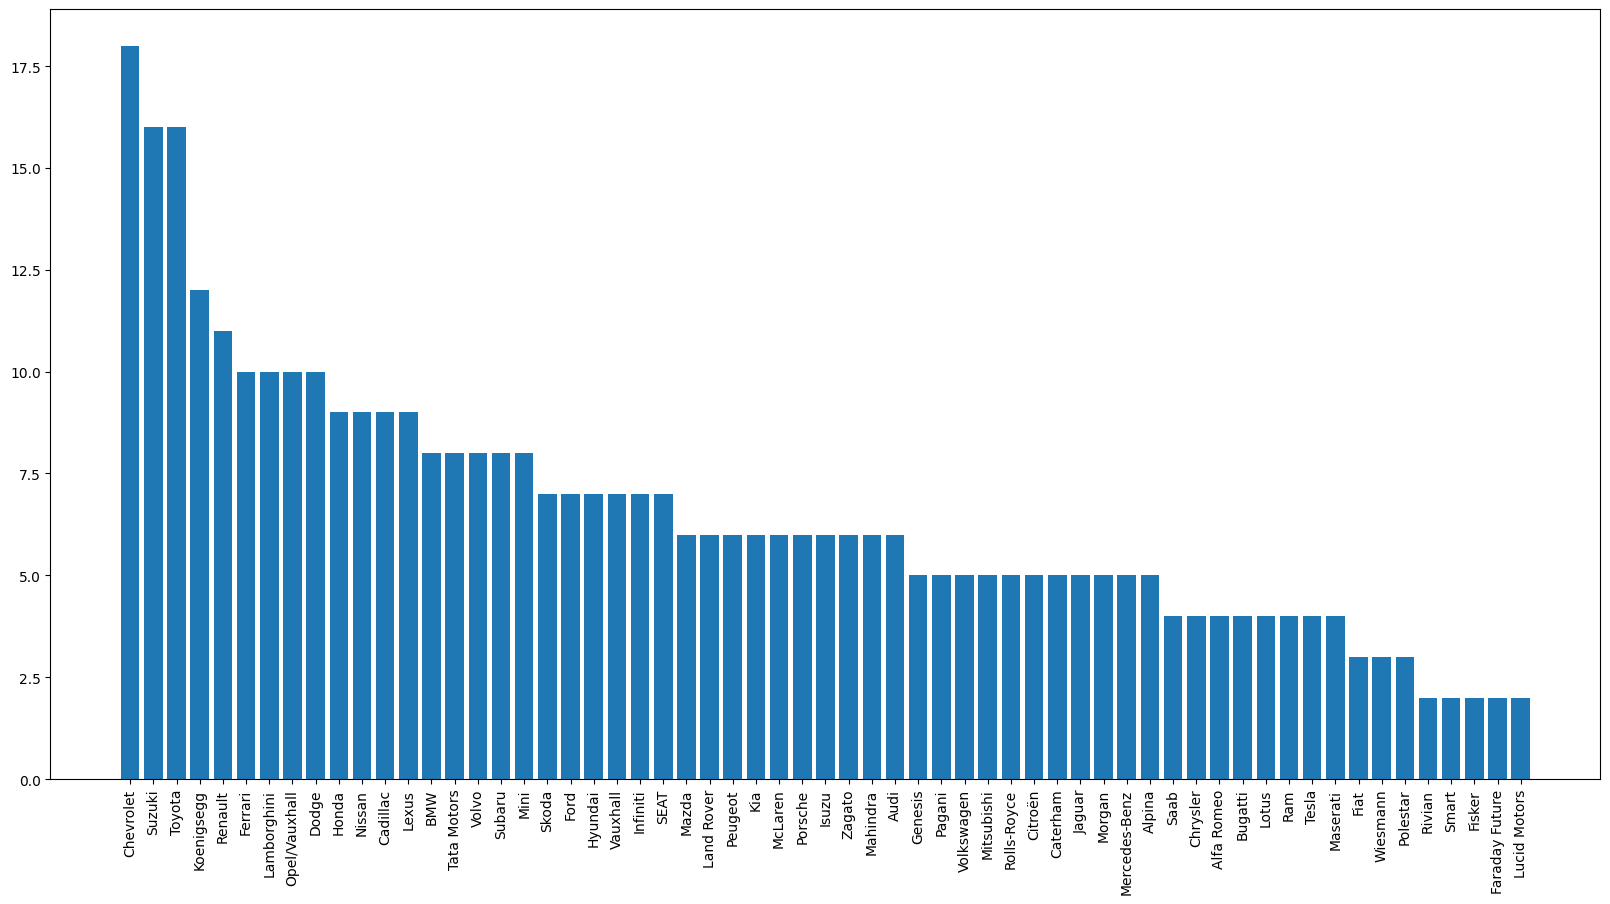

In [34]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
sorted_value=value_count.sort_values(ascending=False)
plt.bar(sorted_value.index, sorted_value.values)
plt.xticks(range(len(sorted_value)), sorted_value.index,rotation=90)
plt.show()

### Top 3 luxry and top 3 affordable cars?

In [35]:
length_ = len(blocks)
avg_cost_company_model=list()
for i in range(0,length_):
    avg_cost_company_model.append(int(df_car_models[df_car_models['Company']==blocks[i]]['cleaned_prices'].mean()))

In [36]:
avg_cost_company_model[:5]

[427565, 18445, 31328, 28752, 34425]

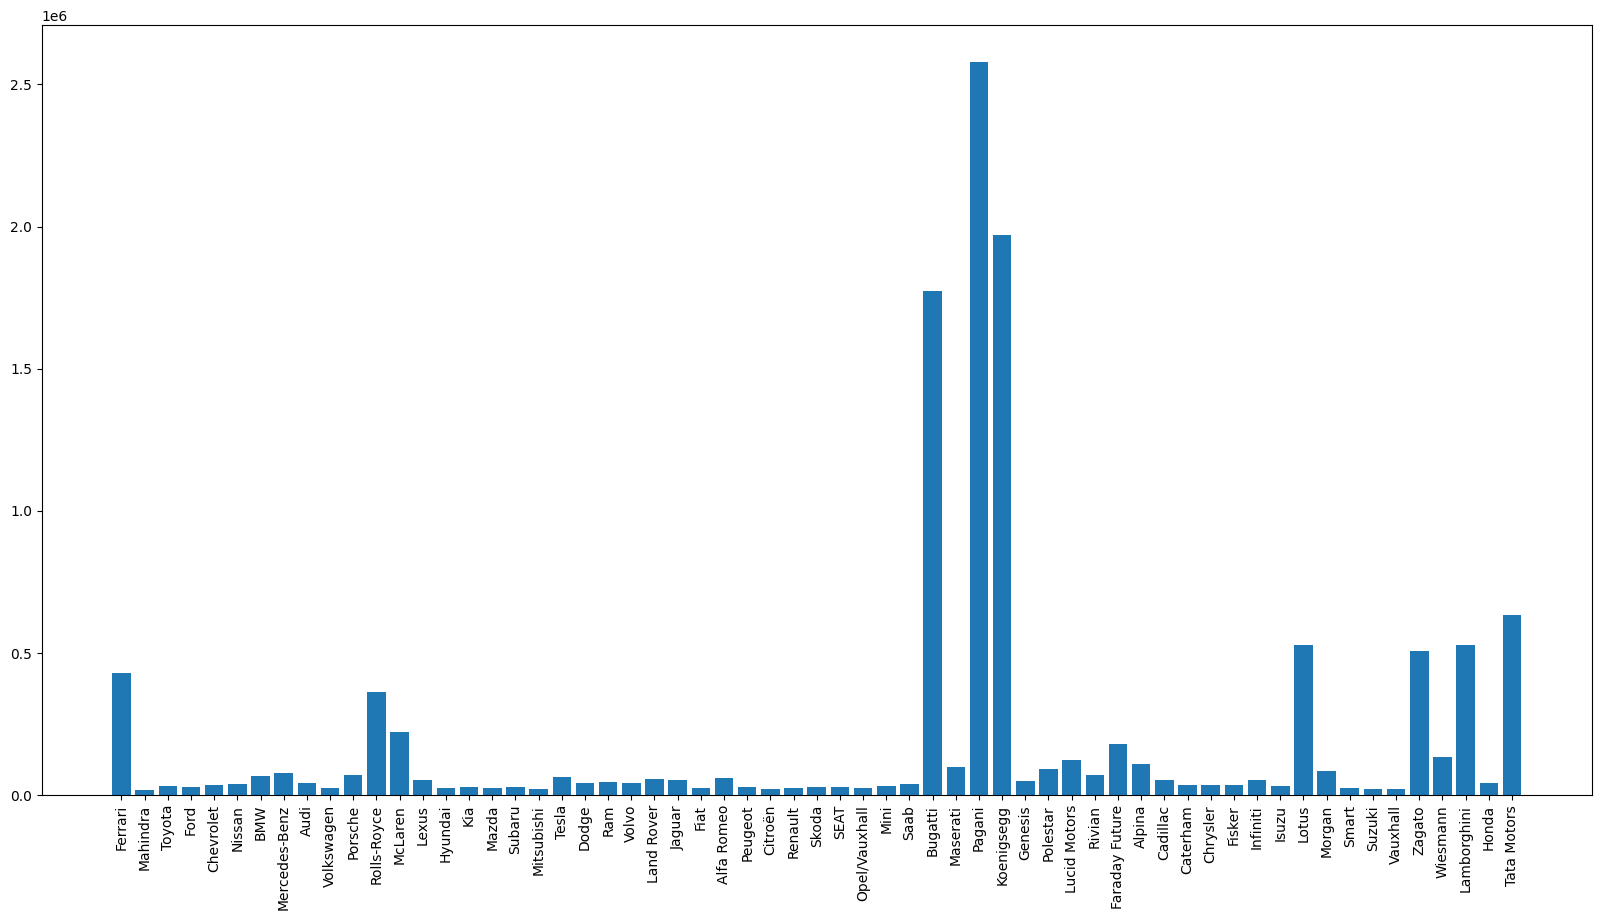

In [37]:
plt.figure(figsize=(20, 10))
plt.bar(blocks,avg_cost_company_model)
plt.xticks(range(len(avg_cost_company_model)), blocks,rotation=90)
plt.show()

In [38]:
df=pd.DataFrame([],columns=['Company','Avg_car_cost'])
df['Company']=blocks
df['Avg_car_cost']=avg_cost_company_model
df.head()

,Company,Avg_car_cost
0,Ferrari,427565
1,Mahindra,18445
2,Toyota,31328
3,Ford,28752
4,Chevrolet,34425


In [39]:
#Top 3 luxury car based on avg price of cars
df_sorted=df.sort_values(by='Avg_car_cost',ascending=False)
df_sorted.head(3)

,Company,Avg_car_cost
37,Pagani,2580000
38,Koenigsegg,1970833
35,Bugatti,1775000


In [40]:
# Top 3 Affordable cars
df_sorted.tail(3)

,Company,Avg_car_cost
55,Vauxhall,20974
18,Mitsubishi,20868
1,Mahindra,18445


In [41]:
#Top 3 luxury models
df_cost=df_car_models.sort_values(by='cleaned_prices',ascending=False)
df_cost[['Company','Model','cleaned_prices']].head(3)

,Company,Model,cleaned_prices
252,Koenigsegg,CCXR Trevita,4800000.0
348,Lamborghini,Sian,3200000.0
244,Pagani,Huayra Imola,3200000.0


In [42]:
# Top 3 affordable cars for the middle class
df_cost[['Company','Model','cleaned_prices']].tail(3)

,Company,Model,cleaned_prices
400,Tata Motors,Altroz,7369.127517
402,Tata Motors,Tigor,7369.127517
401,Tata Motors,Tiago,5624.161074
